In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

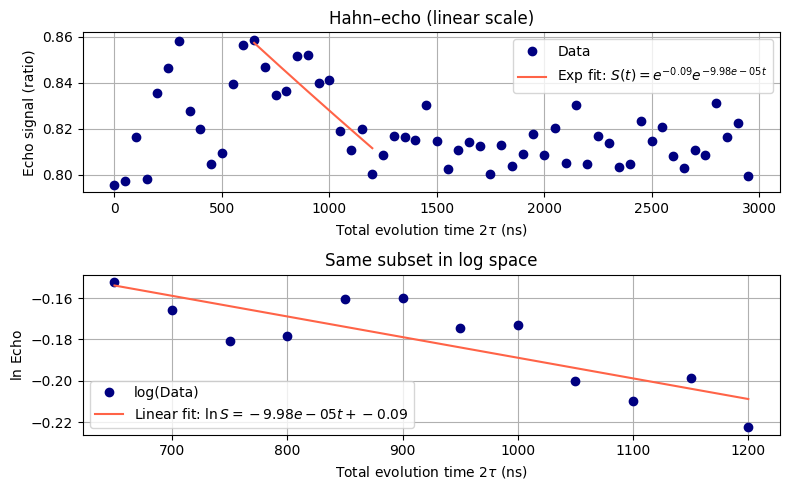

/var/folders/11/tl3ls3ln7ys_dhylsjhy27z00000gn/T/ipykernel_99101/3364103890.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


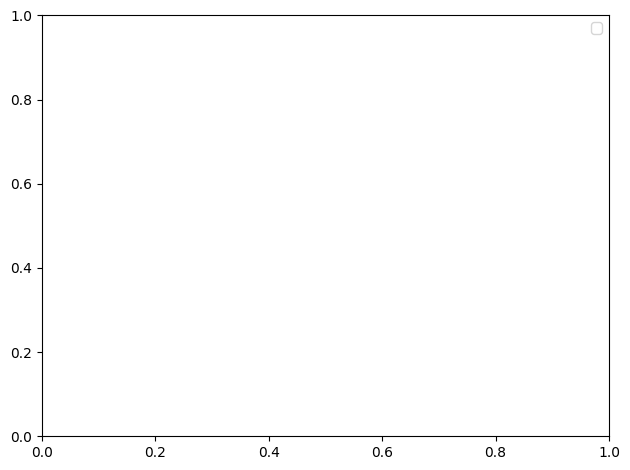

In [ ]:
# -------------------------------------------------
# 1.  Load the data -------------------------------
# -------------------------------------------------
df = pd.read_excel(
    "/Users/adampearl/Documents/191/GitHub/nv-center/Second_draft/code/hahndata_0422.xlsx"
)
t_ns   = df["Time (ns) - 2/1 Ratio (Avg)"].to_numpy()   # total evolution 2τ
S_data = df["Ratio - 2/1 Ratio (Avg)"].to_numpy()

t = t_ns                                # keep everything in ns

S_cut = S_data[13:25]
t_cut = t_ns[13:25]

# 1.  Transform y-data
logS_cut = np.log(S_cut)               # natural log

# 2.  Fit log(y) = b*t + a
b, a = np.polyfit(t_cut, logS_cut, 1)  # slope = b, intercept = a

# 3.  Evaluate the exponential fit over any time axis you like
t_fit = np.linspace(t_cut.min(), t_cut.max(), 300)
S_fit  = np.exp(b * t_fit + a)         # = A * exp(b t)  with A = exp(a)

# 4.  Plot -------------------------------------------------------
fig, ax = plt.subplots(2, 1, figsize=(8, 5))

# (a) full data with exponential fit
ax[0].plot(t, S_data, 'o', label='Data', color='navy')
ax[0].plot(t_fit, S_fit, '-', color='tomato',
           label=rf'Exp fit: $S(t)=e^{{{a:.2f}}}e^{{{b:.2e}t}}$')
ax[0].set_xlabel(r'Total evolution time $2\tau$ (ns)')
ax[0].set_ylabel('Echo signal (ratio)')
ax[0].set_title('Hahn–echo (linear scale)')
ax[0].legend();  ax[0].grid(True)

# (b) same subset *in log scale* with the straight line
ax[1].plot(t_cut, logS_cut, 'o', color='navy', label='log(Data)')
ax[1].plot(t_cut, b * t_cut + a, '-', color='tomato',
           label=rf'Linear fit: $\ln S = {b:.2e} t + {a:.2f}$')
ax[1].set_xlabel(r'Total evolution time $2\tau$ (ns)')
ax[1].set_ylabel(r'$\ln\,\mathrm{Echo}$')
ax[1].set_title('Same subset in log space')
ax[1].legend();  ax[1].grid(True)





plt.legend()
plt.tight_layout()
plt.show()